<a href="https://colab.research.google.com/github/jorgg3/Regresion-y-Proyectos-en-Python/blob/main/Practica_5__Jorge_de_la_Cruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Números pseudoaleatorios
José Jorge Martínez de la Cruz
## Ejercicio 1


El método del cuadrado nos permite obtener una sucesión de números aleatorios entre 0 y 9999. Este método fue desarrollado por J. Von Neuman, S. Ulm y N. Metropolis en 1964 en Los Alamos Laboratory, para simular colisiones de neutrones, como parte del proyecto Manhattan.  El gran problema de este método es que siempre degenera a cero, pero dependiendo de la semilla podría ser que la cantidad de pasos sea tan grande como queramos.

- Programe una función que, dada una semilla y un cierto máximo número $N$, devuelva una sucesión de números aleatorios en $[0,1]$ a lo más $N$ elementos.


In [ ]:
def cuadrado (seed, N): #definimos la función
  n = 0  #Nuestro contador, que nos dara el ciclo

  aleatorios = [] #La lista donde guardaremos nuestros puntos

  while n < N: #Condición inicial del ciclo

   seed_1 = str(seed**2) #Haremos uso de los str para facilitar el algoritmo
   while len(seed_1) < 8: #Acompletar en caso de que no sean 8 dígitos
    seed_1 = "0"+ seed_1

   if seed_1[2:6] == '0000': #Cuando nuestro algoritmo se degenere al 0, romper el ciclo
    aleatorios.append(0) #Ingresar un 0 y romper
    break
   else:
      seed = int(seed_1[2:6]) #Regresar a entero el valor
      aleatorios.append((seed)/10000) #Guardamos el valor del cuadrado / 10^4
   n += 1 #Añadimos 1 al contador
  return aleatorios #Regresar la tupla

In [ ]:
cuadrado(1111, 5) #Ejemplo, usando como semilla 1111, con N= 5

[0.2343, 0.4896, 0.9708, 0.2452, 0.0123]

- Si usamos como semilla $x_0=4450$  ¿Cuánto tiempo tardará en degenerar a cero? ¿Si usamos $x_0=4451$? ¿ Qué puedes conlcuir de esto?
Para realizar la aproximación, usaremos un ciclo que nos dira el paso en el que se degenera a 0

In [ ]:
n = 1
while cuadrado(4450,n)[n-1] != 0: #Condición que nos contará los pasos tomados
  n += 1
print(f"La semilla 4450 tardó {n} pasos en degenerar a 0 ")

La semilla 4450 tardó 22 pasos en degenerar a 0 


En el primer caso, con la semilla 4450 tardarón 6 pasos en que se degenerará a 0

In [ ]:
n = 1
while cuadrado(4451,n)[n-1] != 0: #Condición que nos contará los pasos tomados
  n += 1
print(f"La semilla 4451 tardó {n} pasos en degenerar a 0 ")

KeyboardInterrupt: ignored

Con la segunda semilla, se tuvo que romper el ciclo, pues, indicaba que sería un ciclo infinito o tomaría un número muy grande de pasos. Con esto, concluímos que no lo importante aquí es la semilla, pues habrá que escoger una semilla adecuada para evitar que nuestros números aleatorios vayan a 0 de manera muy rápida.

- Muestre que este método aproxima la distribución uniforme.<br/>
Para esto, aproxime la función de distribución acumulada, dada por
	$$
	F_U(z)=P\left[\{\omega \in \Omega: U(\omega)\leq z\}\right], \qquad z\in \mathbb{R}
	$$
	usando frecuencias relativas de aparición.


In [ ]:
#primero, crearemos la indicadora, la cual nos ayudará a contabilizar las apariciones de la frecuiencia que buscamos
def contadorfr (lista, z, x=0 ):
  cont = 0
  for i in lista:
    if i <= z and i >x:
      cont += 1
  return cont/len(lista)

  Una vez que tenemos la función que nos ayudará a calcular las frecuencias de cada número que escogamos, en este caso, entre el 0 y el 1. Ahora, lo que tenemos que hacer, es un vector, con números, entre el 0 y el 1, de manera que funcione como nuestro vector

In [ ]:
import numpy as np
x = np.arange(-0.7,1.3,0.01)
y = []
lista = cuadrado(9356, 100) #Usando la semilla 9356
#Ahora, lo que haremos, es ir llamando a la función en cada uno de los elementos
for i in range(len(x)):
  a = contadorfr(lista, x[i])
  y.append(a)

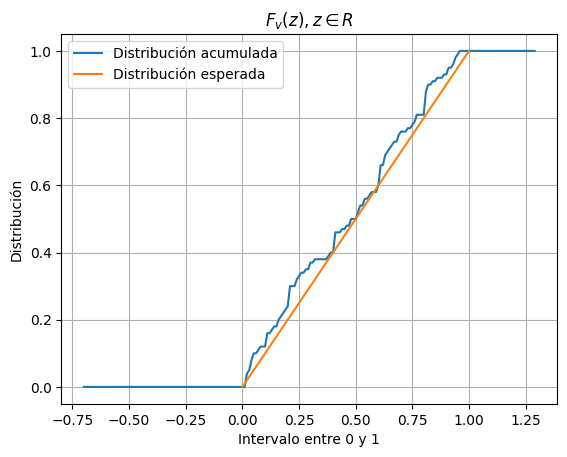

In [ ]:
import matplotlib.pyplot as plt
z = np.arange(0,2,1)
plt.plot(x,y,label = "Distribución acumulada")
plt.plot(z,z, label = "Distribución esperada")
plt.xlabel("Intervalo entre 0 y 1")
plt.ylabel("Distribución")
plt.grid()
plt.legend()
plt.title("$F_v(z), z \in R$")
plt.show()


Vemos que, en esencia, la función si logra aproximar la función de la distribución acumulada, que, efectivamene antes del 0 es 0, y, después del 1 es 1, y en el intervalo se mantiene creciente.

## Ejercicio 2

Usando números pseudoaleatorios, aproxime el valor de la integral
$$
\int_{0}^{0.55}\tfrac{\Gamma(100)}{\Gamma(50)\Gamma(50)}x^{49}(1-x)^{49}dx,
$$
que corresponde a la probabilidad de que una variable aleatoria con distribución $Beta(50,50)$ tome valores menores que $0.55$. Veamos que $\tfrac{\Gamma(100)}{\Gamma(50)\Gamma(50)}$ es un número constante y por lo tanto, no depende de $x$, así que podemos sacarlo de la integral, teniendo: $$ \tfrac{\Gamma(100)}{\Gamma(50)\Gamma(50)} \int_{0} ^{0.55}x^{49}(1-x)^{49}dx$$

Para aplicar el método de Montecarlo, veamos que la función en cuestión es acotada, entonces debe de haber un valor máximo que la función tome, digamos  $M$, ahora tenemos que tomar pares ordenados del conjunto de $$ [0,0.55] × [0,M] $$

In [ ]:
#Para ello, creearemos la lista con N=100 elementos aleatorios entre 0 y 1
ab = np.array(cuadrado(9356, 1000)) #Para hacer uso de los operadores con las listas, usarmos numpy
OM = np.array(cuadrado(4578,1000))
#Para c haremos un ciclo que nos ayude a encontrar valores de la función y tomaremos el máximo
x = np.arange(0,0.55, 0.005)
datos = []
for i in x:
  dato = (i**49)*((1-i)**49)
  datos.append(dato)
c = max(datos) #Nuestro valor máximo es el que nos ayudará para acotar la función
OM = c*OM
ab = 0.55*ab

In [ ]:
plt.plot

In [ ]:
#Lo que haremos ahora será un ciclo que nos ayuda a tener el contador y, con ello, la probabilidad
counter = 0
for i in range(len(OM)):
  d = ((ab[i])**49)*((1-(ab[i]))**49) #Aplicamos la función a cada uno de nuestros valores aleatorios
  if OM[i] <= d: #Y comparamos
    counter += 1
p = counter/len(OM) #Sacamos la frecuencia
print(f"p = {counter/len(OM)}")

p = 0.244


Así, para calcular el área tendremos que $$A = M(b-a)p \\ A = (0.55)^{49}(1-0.55)^{49} (0.55)(0.181)$$

In [ ]:
A = c*(0.55)*p
print(f"El área bajo la curva, solo de la integral es de {A}")

El área bajo la curva, solo de la integral es de 4.234605339226392e-31


In [ ]:
#Por las definiciones de la función gamma
f = np.math.factorial(99)
g = np.math.factorial(49)
print(f"Así, el área bajo al curva total es de A ={(f*A)/(g*g)} u^2")

Así, el área bajo al curva total es de A =1.068087565735939 u^2


## Ejercicio 3

Ahora, como todo buen probabilista, nos meteremos un poco en el mundo de los juegos de azar. En este ejercicio deberán simular una variable aleatoria que simule un dado justo y una que simule un dado cargado. <br>
**Dado Justo**:<br>
Deberán simular un dado justo que tenga $k$ caras; es decir que puede salir cada cara con probabilidad $1/k$. Programen una función que reciba el número de caras que tendrá el dado y regrese alguna de ellas con igual probabilidad. <bR>
**Pista**: Recuerden la función de distribución de la uniforme discreta.

**Dado Cargado**:<br>
Ahora, queremos modelar un dado cargado con $k$ caras; es decir que no todas las caras tienen la misma probabilidad de salir. Para poder simular este dado su función deberá recibir un vector de probabilidades $(p_1 ,p_2 ,...,p_k)$ donde $p_i$ es la probabilidad de obtener la i-ésima cara del dado. Recuerden que se debe cumplir que $p_1 +p_2 +...+p_k =1$. <br>
**Pista**: Su función debe ser muy similar a la del dado justo pero ahora en lugar de aparecer las probabilidades $1/k$ debarán aparecer las $p_i$.

In [ ]:
def dado(k):
  lista = cuadrado(9356, 1000000) #Generamos la lista de números aleatorios
  proporciones = [] #Una lista donde se regresen los vectores

  for i in range (k): #Para cada una de las caras
    b = contadorfr(lista, (i+1)/k, i/k) #Usaremos el contador frecuencial, con 2 números
    proporciones.append(b) #Así, aseguramos que el número quede entre [i/k, i+1/k]
  return proporciones


Pongamos a prueba, entonces, la función debería devolver un vector en donde la suma de sus entradas sea $1$

In [ ]:
sum(dado(4))

1.0

Vemos que, en efecto, la suma del vector dado es 1, ahora, en este caso, tenemos que la proporción de aparición de nuestros números aleatorios no es certeramente uniforme (visto ya en la gráfica de arriba), entonces , en el caso del dado de 4 caras, debería de tener una probabilidad aproximada de $0.25$

In [ ]:
dado(4)

[0.250008, 0.249992, 0.250003, 0.249997]

Vemos que, aunque las caras no dan completamente 0.25 como se esperaría, el error no es muy grande y puede repararse con una semilla más precisa

Para realizar el dado cargado, veamos que se tiene que recibir una lista de vectores en forma
$$ p = [p_1, p_2, p_3, ..., p_n] $$
así, como $$ \sum _{i=1}^{n} p_i = 1$$ podemos dividir el intervalo $[0,1]$ de manera $[0,1] = [0, p_1] \cup (p_1, p_1+p_2] \cup (p_1 + p_2, p_1 + p_2 + p_3] \cup ... \cup (\sum_{i = 1}^{n-1}p_i,1]$

In [ ]:
def dadocargado(vector, k):
  lista = cuadrado(2578,10000) #Creamos un vector con números aleatorios entre el 0 y el 1
  proporciones = [] #Vector de probabilidades
  a = 0
  b = 0 #Contadores
  for i in range(k):
    b = b + vector[i]
    c = contadorfr(lista, b, a) #Aplicamos la idea explicada arriba con los pi's
    proporciones.append(c) #Ingresamos la frecuencia al vector
    a = b
  return proporciones


De la misma manera, pondremos a prueba el código esperando que la suma sea 1 y que el vector sea similar al que dimos de entrada

In [ ]:
vector =[0.567, 0, 0.433, 0]
print(f"La suma del vector de regreso es {sum(dadocargado(vector,4))}")
print(f"Además, dado el vector {vector}, regresa el vector {dadocargado(vector,4)}")

La suma del vector de regreso es 1.0
Además, dado el vector [0.567, 0, 0.433, 0], regresa el vector [0.5005, 0.0, 0.4995, 0.0]


Podemos ver que, aunque la aproximación es cercana, (esencialmente) el dado resulta cargado hacia los vectores que pedimos, esto puede deberse a lo mismo, el método y/o la semilla que aproxima no es del todo uniforme, por lo que al no hay una proporción de distribución uniforme al momento de realizar la frecuencia.

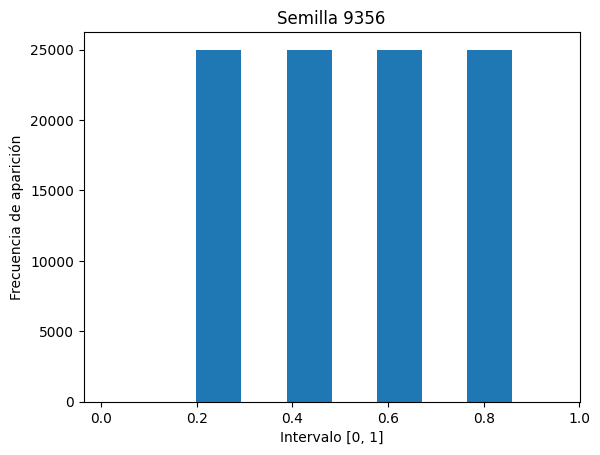

In [ ]:
plt.hist(cuadrado(9356,100000))
plt.title("Semilla 9356")
plt.xlabel("Intervalo [0, 1]")
plt.ylabel("Frecuencia de aparición")
plt.show()

A manera de conclusión, viendo los histogramas, la proporción y frecuencia depende completamente de la semilla, habrá que encontrar una semilla que haga que la frecuencia sea uniforme para lograr buenas aplicaciones probabilisticas

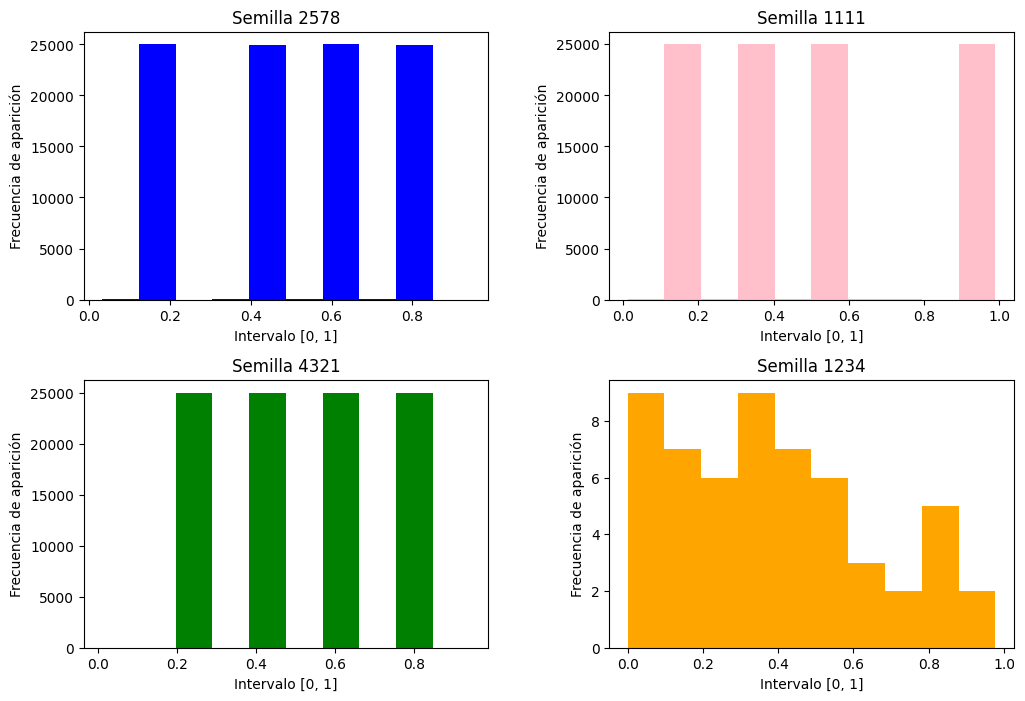

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

histograma_0 = plt.subplot(2, 2, 1)
histograma_1 = plt.subplot(2,2, 2)
histograma_2= plt.subplot(2,2, 3)
histograma_3 = plt.subplot(2,2, 4)

histograma_0.hist(cuadrado(2578,100000), color = "blue")
histograma_0.set_title("Semilla 2578")
histograma_0.set_xlabel("Intervalo [0, 1]")
histograma_0.set_ylabel("Frecuencia de aparición")

histograma_1.hist(cuadrado(1111,100000), color = "pink")
histograma_1.set_title("Semilla 1111")
histograma_1.set_xlabel("Intervalo [0, 1]")
histograma_1.set_ylabel("Frecuencia de aparición")

histograma_2.hist(cuadrado(4321,100000), color = "green")
histograma_2.set_title("Semilla 4321")
histograma_2.set_xlabel("Intervalo [0, 1]")
histograma_2.set_ylabel("Frecuencia de aparición")

histograma_3.hist(cuadrado(1234,100000), color = "orange")
histograma_3.set_title("Semilla 1234")
histograma_3.set_xlabel("Intervalo [0, 1]")
histograma_3.set_ylabel("Frecuencia de aparición")

plt.show()